In [155]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
houses_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

houses_df.head(3)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500


In [156]:
houses_df.describe(include=['O'])

,mszoning,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,...,garagetype,garagefinish,garagequal,garagecond,paveddrive,poolqc,fence,miscfeature,saletype,salecondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


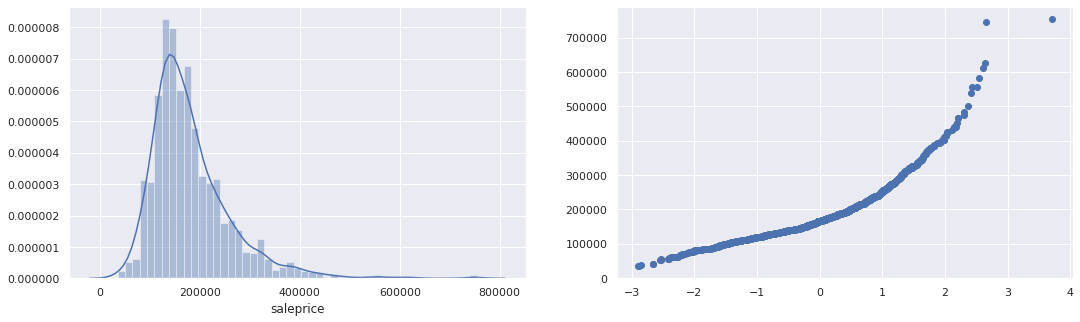

In [157]:
sns.set(style='darkgrid')

# Checking for normality in the target variable 'saleprice', visually, using a qq plot
norm = np.random.normal(0, 1, len(houses_df))

# Sorting the values in ascending order.
norm.sort()

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.distplot(houses_df.saleprice)

plt.subplot(1,2,2)
plt.scatter(norm, houses_df.saleprice.sort_values())

plt.show()

In [158]:
# Missing value number and type detection
for column_name in houses_df.columns[3:]:
    nan_list = []
    print("Problematic values: {}".format(column_name))
    for idx, value in enumerate(houses_df[column_name]):
        if pd.isna(value):
            nan_list.append(str(value))
    print(len(nan_list), ': ', set(nan_list))
print(len(houses_df))

Problematic values: lotfrontage
259 :  {'nan'}
Problematic values: lotarea
0 :  set()
Problematic values: street
0 :  set()
Problematic values: alley
1369 :  {'None'}
Problematic values: lotshape
0 :  set()
Problematic values: landcontour
0 :  set()
Problematic values: utilities
0 :  set()
Problematic values: lotconfig
0 :  set()
Problematic values: landslope
0 :  set()
Problematic values: neighborhood
0 :  set()
Problematic values: condition1
0 :  set()
Problematic values: condition2
0 :  set()
Problematic values: bldgtype
0 :  set()
Problematic values: housestyle
0 :  set()
Problematic values: overallqual
0 :  set()
Problematic values: overallcond
0 :  set()
Problematic values: yearbuilt
0 :  set()
Problematic values: yearremodadd
0 :  set()
Problematic values: roofstyle
0 :  set()
Problematic values: roofmatl
0 :  set()
Problematic values: exterior1st
0 :  set()
Problematic values: exterior2nd
0 :  set()
Problematic values: masvnrtype
8 :  {'None'}
Problematic values: masvnrarea
8 :

In [159]:
# Replace missing numerical values with the mean and missing categoricals ('None') with 'No--' 
# -- = first to letters of feature, ie. NoFe = 'no fence' 
# and the lone missing electrical value with house_df.electrical.mode()

houses_df['electrical'].fillna(str(houses_df['electrical'].mode()), inplace=True)

for column_name in houses_df.columns[3:]:
    for idx, value in enumerate(houses_df[column_name]):
        if pd.isna(value):
            try:
                houses_df[column_name].fillna(houses_df[column_name].mean(), inplace=True)
            except:
                houses_df[column_name].fillna('No' + column_name[:2].capitalize(), inplace=True)

In [160]:
# Verifying missing value correction
for column_name in houses_df.columns[3:]:
    nan_list = []
    print("Problematic values: {}".format(column_name))
    for idx, value in enumerate(houses_df[column_name]):
        if pd.isna(value):
            nan_list.append(str(value))
    print(len(nan_list), ': ', set(nan_list))
print(len(houses_df))

Problematic values: lotfrontage
0 :  set()
Problematic values: lotarea
0 :  set()
Problematic values: street
0 :  set()
Problematic values: alley
0 :  set()
Problematic values: lotshape
0 :  set()
Problematic values: landcontour
0 :  set()
Problematic values: utilities
0 :  set()
Problematic values: lotconfig
0 :  set()
Problematic values: landslope
0 :  set()
Problematic values: neighborhood
0 :  set()
Problematic values: condition1
0 :  set()
Problematic values: condition2
0 :  set()
Problematic values: bldgtype
0 :  set()
Problematic values: housestyle
0 :  set()
Problematic values: overallqual
0 :  set()
Problematic values: overallcond
0 :  set()
Problematic values: yearbuilt
0 :  set()
Problematic values: yearremodadd
0 :  set()
Problematic values: roofstyle
0 :  set()
Problematic values: roofmatl
0 :  set()
Problematic values: exterior1st
0 :  set()
Problematic values: exterior2nd
0 :  set()
Problematic values: masvnrtype
0 :  set()
Problematic values: masvnrarea
0 :  set()
Probl

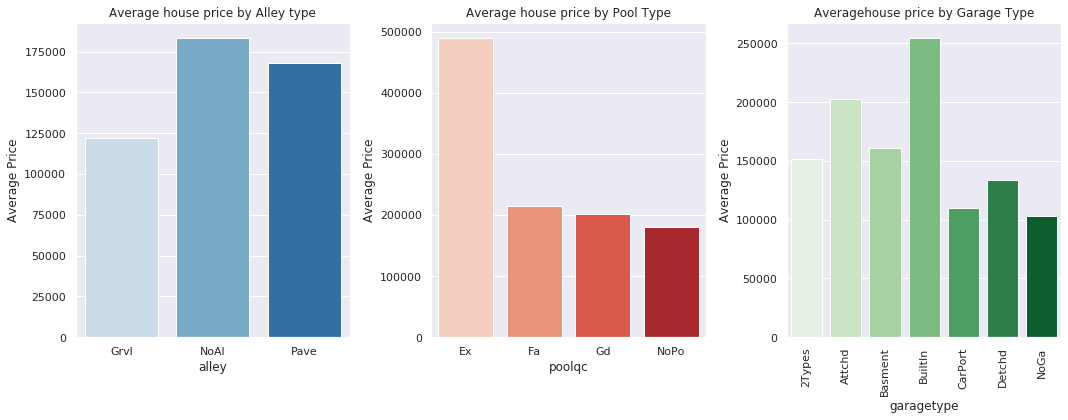

In [161]:
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
sns.barplot(houses_df.groupby('alley')['saleprice'].mean().index, houses_df.groupby('alley')['saleprice'].mean(), 
            palette='Blues')
plt.title("Average house price by Alley type")
plt.ylabel("Average Price")

plt.subplot(1,3,2)
sns.barplot(houses_df.groupby('poolqc')['saleprice'].mean().index, houses_df.groupby('poolqc')['saleprice'].mean(), 
            palette='Reds')
plt.title("Average house price by Pool Type")
plt.ylabel("Average Price")

plt.subplot(1,3,3)
sns.barplot(houses_df.groupby('garagetype')['saleprice'].mean().index, houses_df.groupby('garagetype')['saleprice'].mean(), 
            palette='Greens')
plt.title("Averagehouse price by Garage Type")
plt.ylabel("Average Price")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


In [165]:
# Creating our dummy variables
columns = ['alley','poolqc','garagetype']

# Create a dataframe with added dummy features
houses_df_dummies = pd.get_dummies(houses_df, columns=columns)
dummy_columns = [c for c in houses_df_dummies.columns if any([c.startswith(n) for n in columns])]
dummy_columns

['alley_Grvl',
 'alley_NoAl',
 'alley_Pave',
 'poolqc_Ex',
 'poolqc_Fa',
 'poolqc_Gd',
 'poolqc_NoPo',
 'garagetype_2Types',
 'garagetype_Attchd',
 'garagetype_Basment',
 'garagetype_BuiltIn',
 'garagetype_CarPort',
 'garagetype_Detchd',
 'garagetype_NoGa']

In [163]:
houses_df_dummies[dummy_columns].head()

,alley_Grvl,alley_NoAl,alley_Pave,poolqc_Ex,poolqc_Fa,poolqc_Gd,poolqc_NoPo,garagetype_2Types,garagetype_Attchd,garagetype_Basment,garagetype_BuiltIn,garagetype_CarPort,garagetype_Detchd,garagetype_NoGa
0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
1,0,1,0,0,0,0,1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,1,0,1,0,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,0,0,1,0
4,0,1,0,0,0,0,1,0,1,0,0,0,0,0


In [164]:
X = houses_df_dummies[dummy_columns]
Y = houses_df_dummies.saleprice

# We need to manually add a constant in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     49.80
Date:                Fri, 17 Jan 2020   Prob (F-statistic):           5.54e-93
Time:                        21:52:40   Log-Likelihood:                -18310.
No. Observations:                1460   AIC:                         3.664e+04
Df Residuals:                    1448   BIC:                         3.671e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.421e+05   1.22e+04     11.653      0.000    1.18e+05    1.66e+05
alley_Grvl          3.144e+04   8631.151      3.642      0.000    1.45e+04    4.84e+04
alley_NoAl          4.564e+04   5760.939      7.922      0.000    3.43e+04    5.69e+04
alley_Pave          6.502e+04   9181.117      7.082      0.000     4.7e+04     8.3e+04
poolqc_Ex            2.74e+05   4.01e+04      6.839      0.000    1.95e+05    3.53e+05
poolqc_Fa          -3.509e+04      4e+04     -0.876      0.381   -1.14e+05    4.35e+04
poolqc_Gd           -4.86e+04   3.41e+04     -1.425      0.155   -1.16e+05    1.83e+04
poolqc_NoPo        -4.823e+04   1.68e+04     -2.863      0.004   -8.13e+04   -1.52e+04
garagetype_2Types   1.416e+04   2.45e+04      0.578      0.563   -3.39e+04    6.22e+04
garagetype_Attchd   6.286e+04   5927.408     10.605      0.000    5.12e+04    7.45e+04
garagetype_Basment  2.108e+04   1.45e+04      1.451      0.147   -7422.425    4.96e+04
garagetype_BuiltIn  1.153e+05   8405.071     13.713      0.000    9.88e+04    1.32e+05
garagetype_CarPort -2.953e+04   2.03e+04     -1.458      0.145   -6.93e+04    1.02e+04
garagetype_Detchd  -6325.8937   6311.273     -1.002      0.316   -1.87e+04    6054.322
garagetype_NoGa    -3.542e+04   8554.780     -4.141      0.000   -5.22e+04   -1.86e+04
==============================================================================
Omnibus:                      621.430   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4177.383
Skew:                           1.850   Prob(JB):                         0.00
Kurtosis:                      10.415   Cond. No.                     2.16e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.04e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### This preliminary regression has a low r-squared, thus informing us that our model does not yet explain much of the variation from the mean, y_bar. In other words, only about 27.4% of the change in Y can be explained by the changes in our feature variables, X_i.